In [1]:
######## Load and Run Models

Import All Required Modules

In [21]:
import sys

# Manually add the project root to sys.path
sys.path.append('/Users/joaquinuriarte/Documents/GitHub/sports-betting/')

# === STEP 0: Imports
from modules.model_manager.trainer.trainer import Trainer
from modules.model_manager.predictor.predictor import Predictor
from modules.model_manager.factories.model_factory import ModelFactory
from modules.model_manager.helpers.configuration_loader import ConfigurationLoader as MMConfigLoader
from modules.model_manager.model_manager import ModelManager
from sklearn.model_selection import KFold
from modules.data_structures.model_dataset import ModelDataset
from model_binaries.utils.binary_utils import save_entity, load_entity, cross_val_train, compute_f1, graph_entity, assess_dataset_balance, evaluate_modelV01_predictions, plot_margin_distributions, swap_team_sides_in_dataset, get_model_weights_paths

In [22]:
# === STEP 1: Dependency Instantiations And Global Variable Declarations

## === MODEL MANAGER
yaml_path = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_006.yaml'

checkpoint = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/models'
trainer = Trainer(checkpoint)
predictor = Predictor()
model_factory = ModelFactory()
mm_configuration_loader = MMConfigLoader()

Load Train Datasets into Memory

In [23]:
# File path to load train, test, and val datasets
train_test_val_folder_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v01/scaler"

In [24]:
train_dataset = load_entity(train_test_val_folder_path, "scaled_train.pkl")
validation_dataset = load_entity(train_test_val_folder_path, "scaled_val.pkl")

In [25]:
randomized_train_dataset = swap_team_sides_in_dataset(train_dataset, team_a_prefix="A_", team_b_prefix="B_", label_a_name="final_score_A", label_b_name="final_score_B", add_home_feature=False, swap_probability=.5)
randomized_val_dataset = swap_team_sides_in_dataset(validation_dataset, team_a_prefix="A_", team_b_prefix="B_", label_a_name="final_score_A", label_b_name="final_score_B", add_home_feature=False, swap_probability=.5)

Load & Train on predefined trained and val datasets

In [26]:
# === STEP 4: MODEL MANAGER
yamls = [yaml_path]
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

In [27]:
weights_path = get_model_weights_paths("model_v0.1", yamls)
models = model_manager.load_models(yamls, weights_path)

Assess Performance

In [13]:
predictions = models[0].predict(validation_dataset.examples, return_target_labels=True)

In [14]:
# Get all metrics for trained model on val dataset predictions
metrics = evaluate_modelV01_predictions(predictions, "final_score_A", "final_score_B", "target_final_score_A", "target_final_score_B")
metrics

{'mse_A': 203.99661,
 'mse_B': 212.38531,
 'mae_A': 11.546216,
 'mae_B': 11.7969475,
 'combined_mse': 208.19096,
 'combined_mae': 11.671581,
 'accuracy': 0.6025137470542027,
 'precision': 0.6025137470542027,
 'recall': 1.0,
 'f1': 0.7519607843137256,
 'auc': 0.49535431407207386}

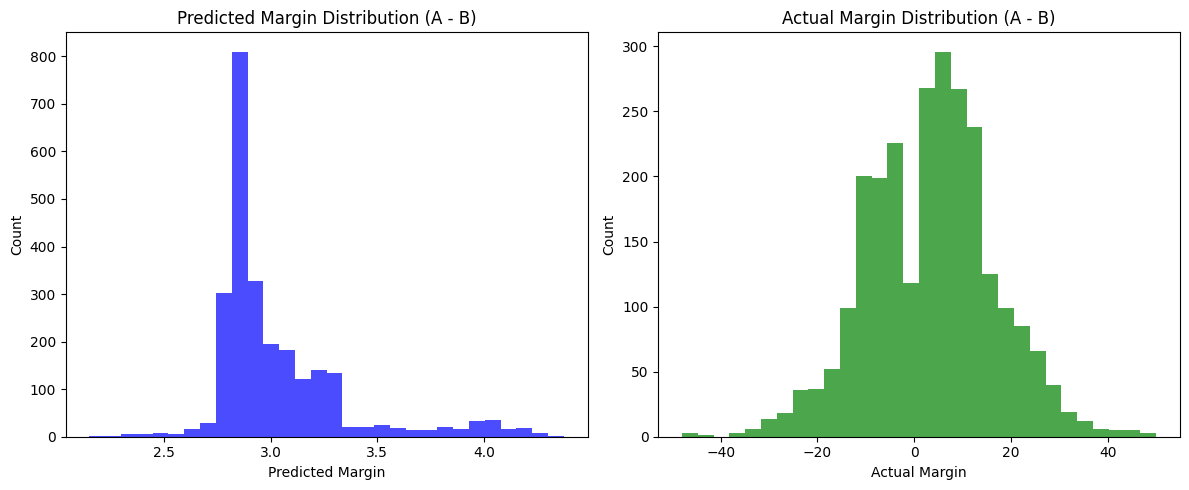

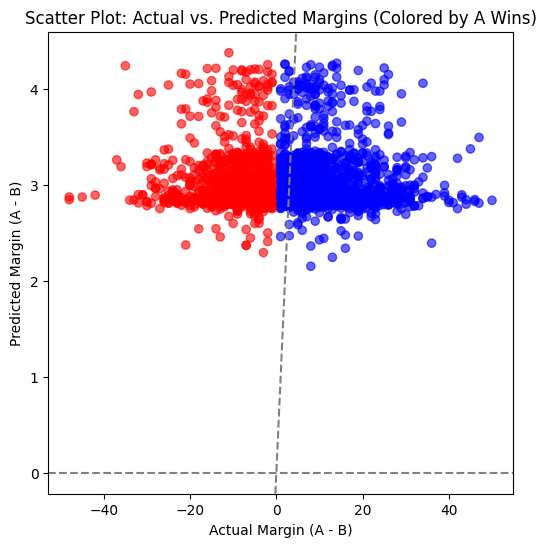

In [15]:
plot_margin_distributions(predictions, "final_score_A", "final_score_B", "target_final_score_A", "target_final_score_B")

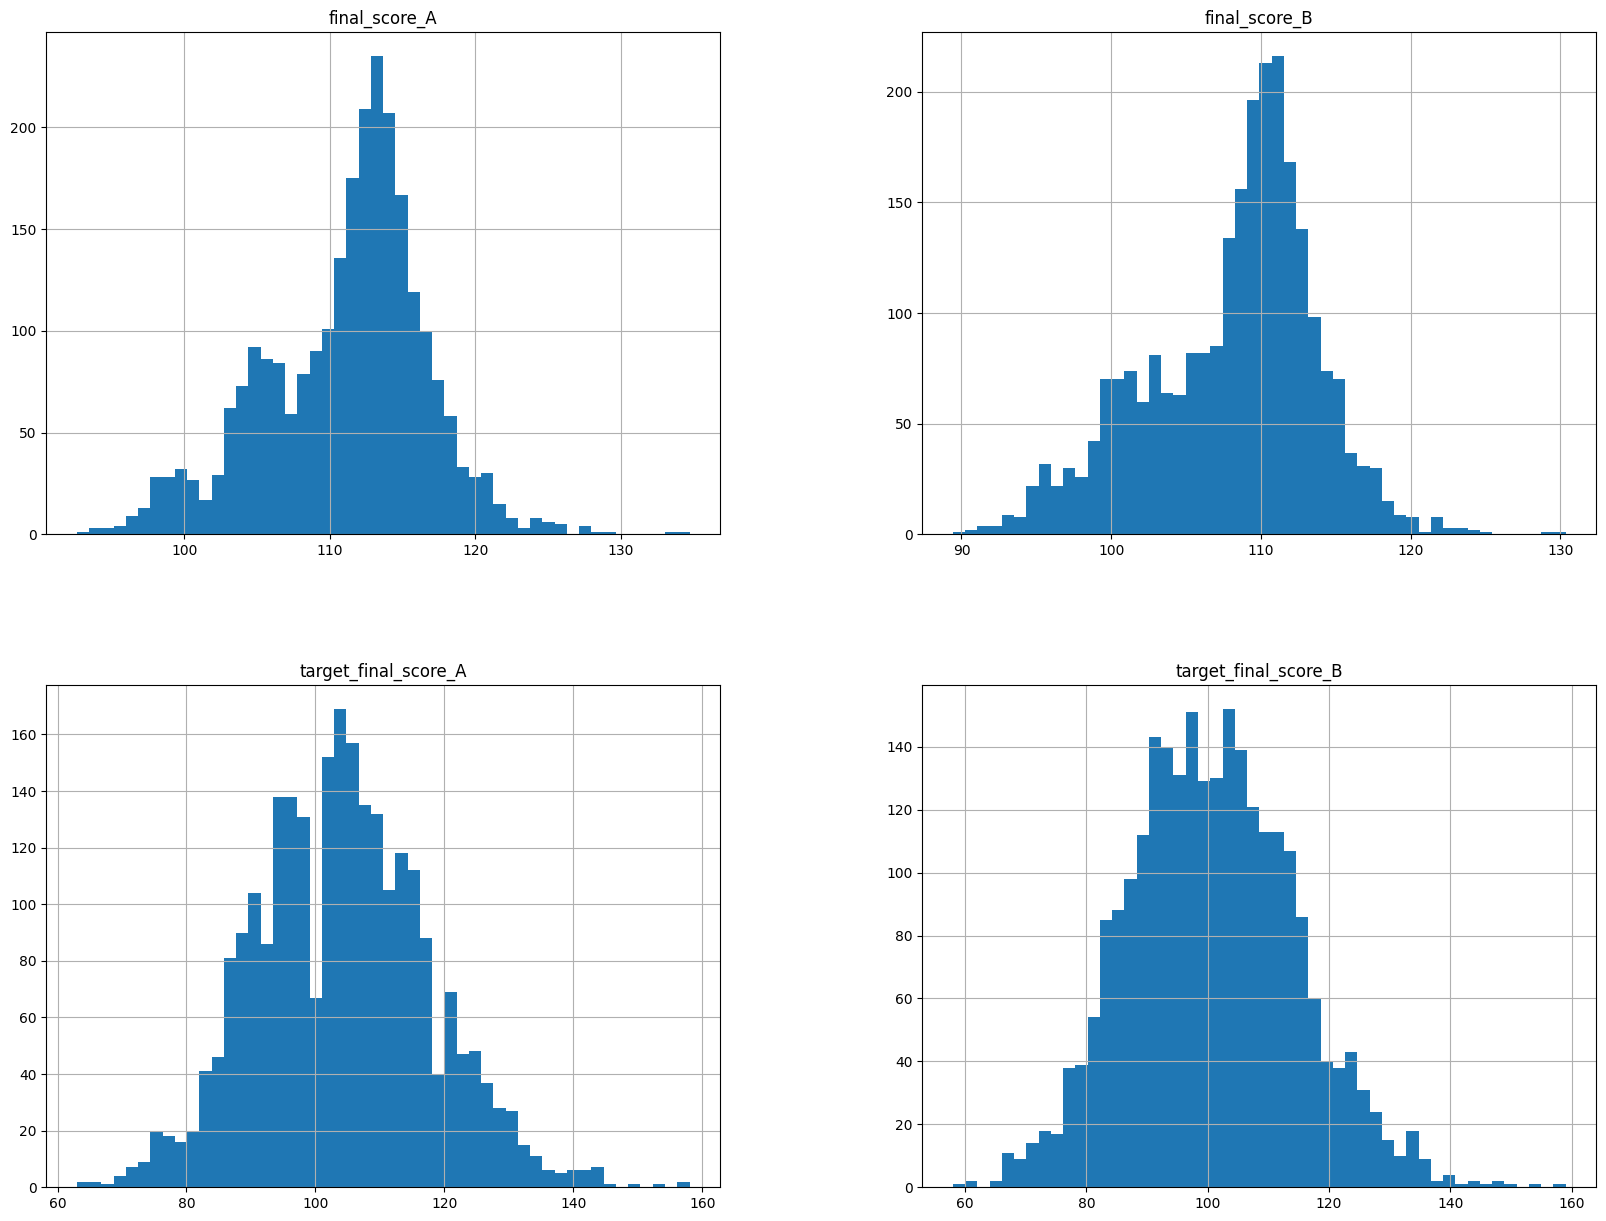

In [16]:
# Graph distribution of predictions against labels 
graph_entity(predictions=predictions,bins=50)

In [17]:
# Print actual predictions against labels
predictions

,final_score_A,final_score_B,target_final_score_A,target_final_score_B
0,117.778526,114.872345,100.0,90.0
1,108.960823,105.804085,113.0,85.0
2,114.247513,111.489799,92.0,84.0
3,113.939384,111.048424,100.0,89.0
4,117.054100,114.148544,105.0,113.0
...,...,...,...,...
2541,104.112083,100.284752,101.0,112.0
2542,114.751030,111.903961,95.0,98.0
2543,102.621422,99.866142,99.0,100.0
2544,108.534828,105.307167,124.0,105.0


Launch Tensorboard

In [ ]:
%tensorboard --logdir=./logs